In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import linkage,dendrogram

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx")
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

# Perform EDA 

In [4]:
## Checking whether any missing value is there or not

In [5]:
df.isnull().any()

ID#                  False
Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award?               False
dtype: bool

In [6]:
df.isna().any()

ID#                  False
Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award?               False
dtype: bool

In [7]:
## Checking any duplicated value is present or not

In [8]:
df.duplicated().any()

False

In [9]:
## Treating the outliers

In [10]:
## Boxplot before removing the outlier

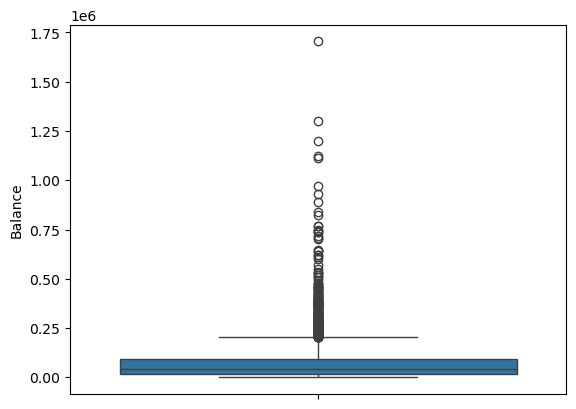

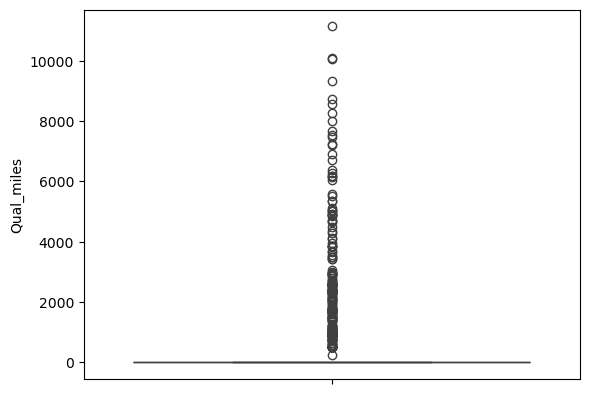

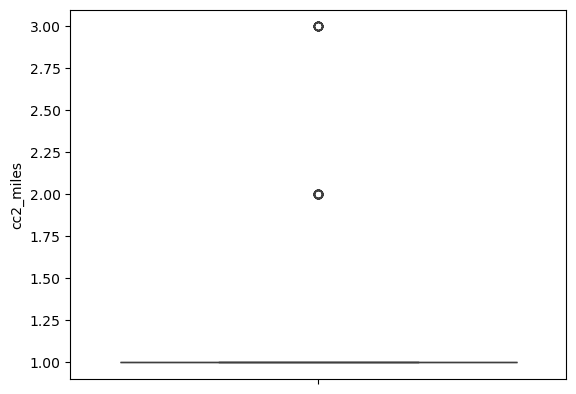

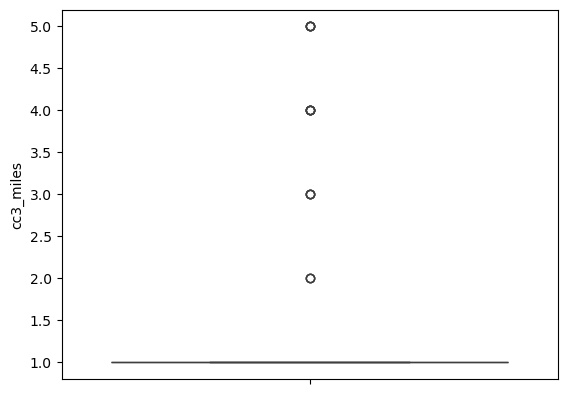

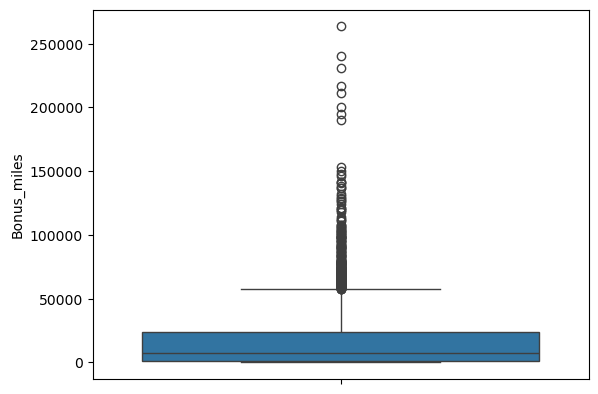

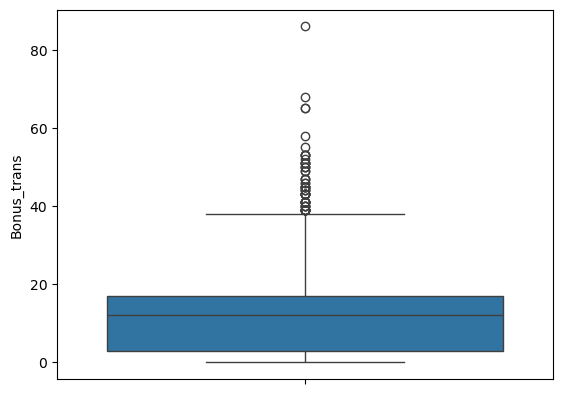

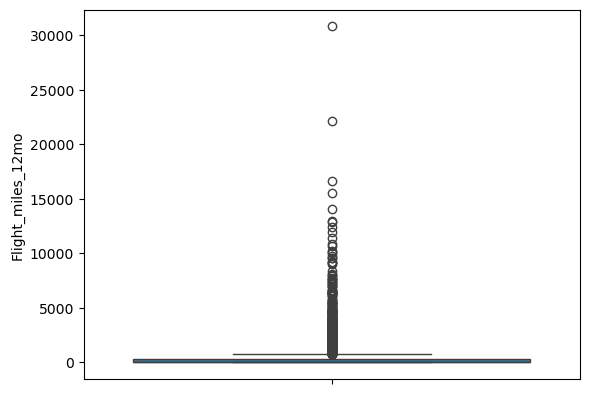

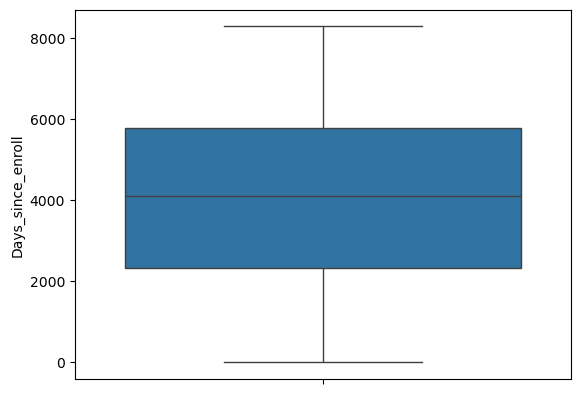

In [11]:
for i in df.columns:
    sns.boxplot(y=df[i])
    plt.ylabel(i)     
    plt.show()

In [12]:
Q1 = df[df.columns].quantile(0.25)
Q3 = df[df.columns].quantile(0.75)
IQR = Q3 - Q1

In [13]:
outliers_mask = (df[df.columns] < (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))
outliers_mask

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     False    False       False      False      False      False   
1     False    False       False      False      False      False   
2     False    False       False      False      False      False   
3     False    False       False      False      False      False   
4     False    False       False      False      False      False   
...     ...      ...         ...        ...        ...        ...   
3994  False    False       False      False      False      False   
3995  False    False       False      False      False      False   
3996  False    False       False      False      False      False   
3997  False    False       False      False      False      False   
3998  False    False       False      False      False      False   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0           False        False              False            False   
1           False        False              False            False   
2           False        False              False            False   
3           False        False              False            False   
4           False        False               True             True   
...           ...          ...                ...              ...   
3994        False        False              False            False   
3995        False        False              False            False   
3996        False        False              False            False   
3997        False        False              False            False   
3998        False        False              False            False   

      Days_since_enroll  Award?  
0                 False   False  
1                 False   False  
2                 False   False  
3                 False   False  
4                 False   False  
...                 ...     ...  
3994              False   False  
3995              False   False  
3996              False   False  
3997              False   False  
3998              False   False  

[3999 rows x 12 columns]

In [14]:
outliers_count = outliers_mask.sum()
print("Number of outliers per column:")
print(outliers_count)

Number of outliers per column:
ID#                    0
Balance              266
Qual_miles           226
cc1_miles              0
cc2_miles             43
cc3_miles             18
Bonus_miles          280
Bonus_trans           63
Flight_miles_12mo    569
Flight_trans_12      565
Days_since_enroll      0
Award?                 0
dtype: int64


In [15]:
outliers_rows = df[outliers_mask.any(axis=1)]
print("Rows containing outliers:")
print(outliers_rows)

Rows containing outliers:
       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
11      12    96522           0          5          1          1        61105   
20      21   120576           0          5          1          1        58831   
...    ...      ...         ...        ...        ...        ...          ...   
3959  3982    13942           0          1          2          1         5822   
3961  3984   131125         862          1          1          1         4993   
3967  3990    26504           0          2          1          1        10599   
3974  3997    58387           0          3          1          1        14581   
3979  4002    57793           0          3          1          1        20959   

 

In [16]:
### New dataset without outliers

In [17]:
df_new = df[~outliers_mask.any(axis=1)]
df_new

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
5               0                  0                0               6942   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
5          0  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[2875 rows x 12 columns]

In [18]:
## Boxplot after removing the outliers

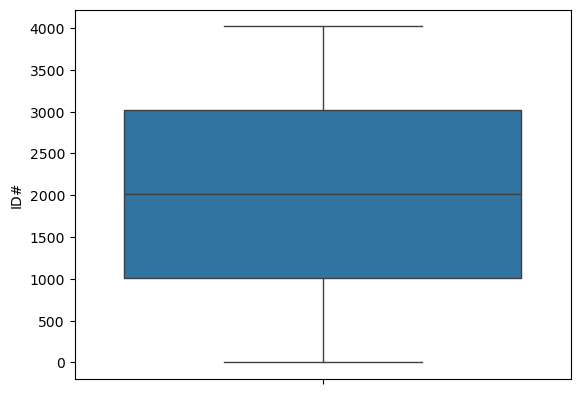

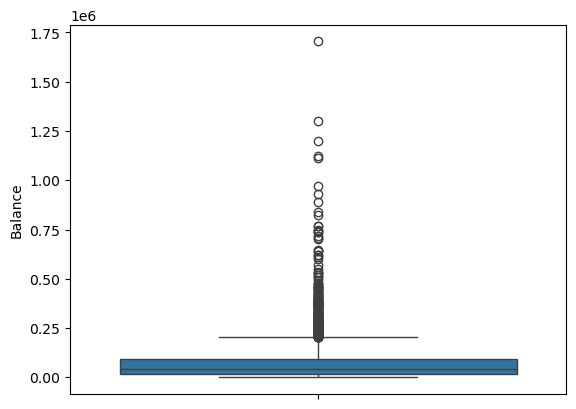

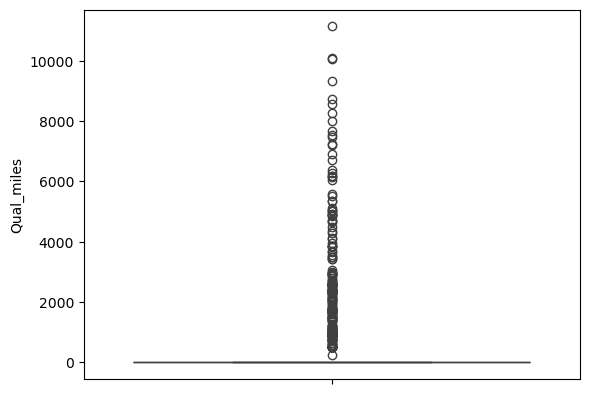

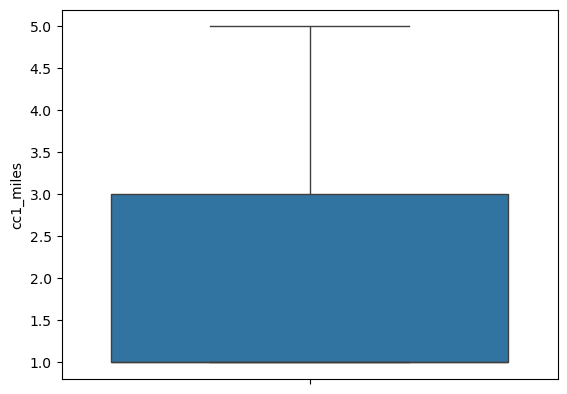

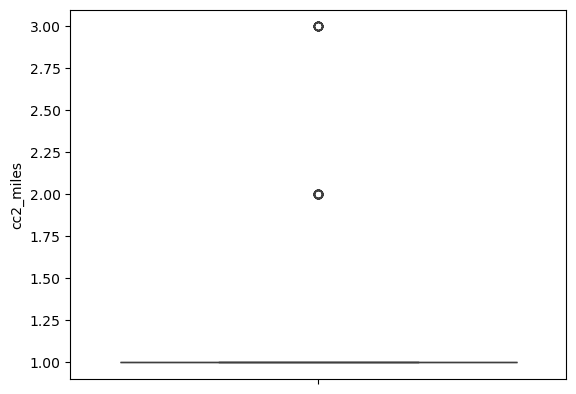

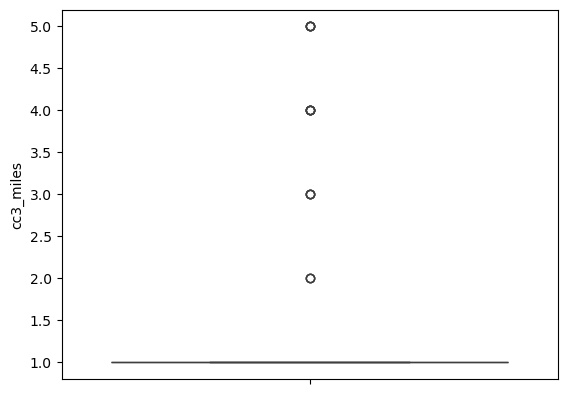

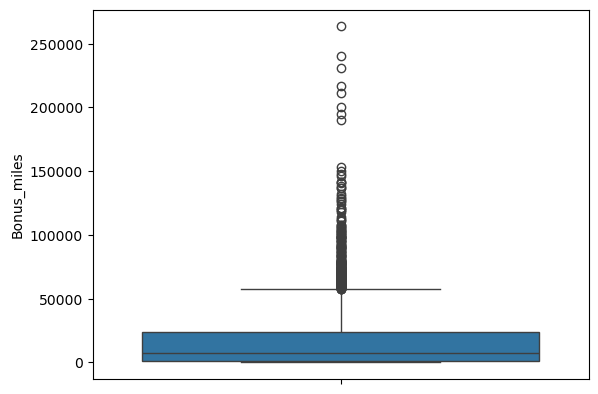

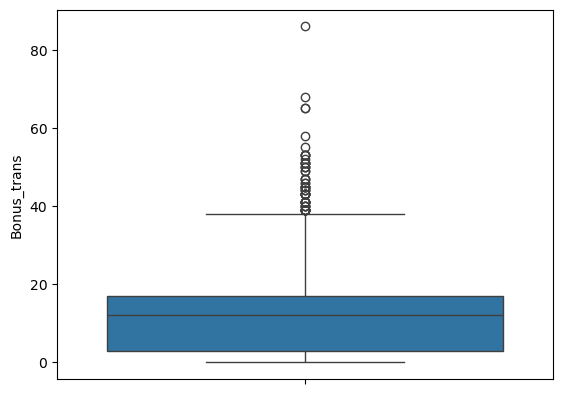

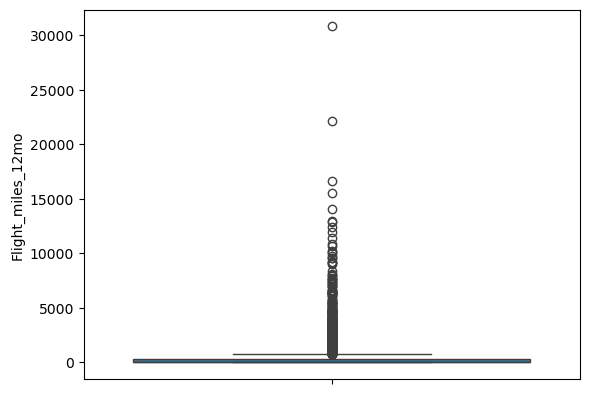

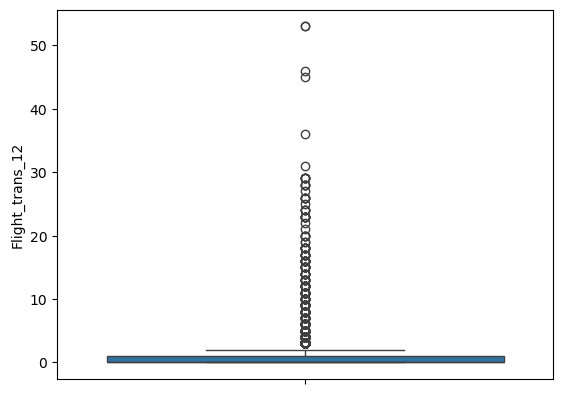

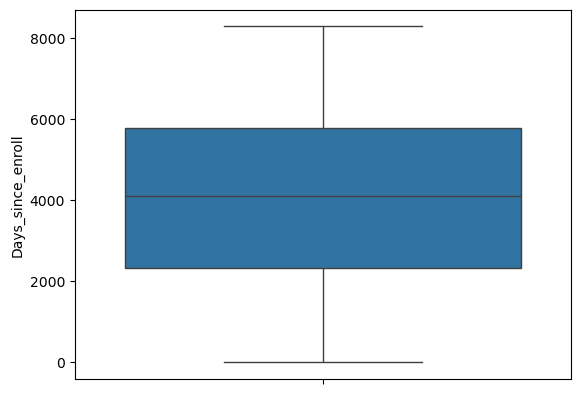

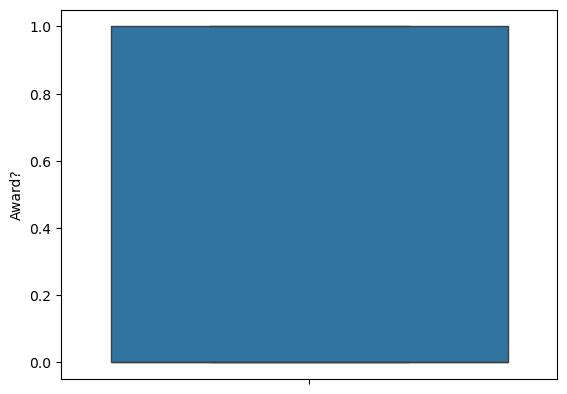

In [19]:
for i in df_new.columns:
    sns.boxplot(y=df[i])
    plt.ylabel(i)     
    plt.show()

In [20]:
## checking the correlation of the dataset

In [21]:
corr=df_new.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

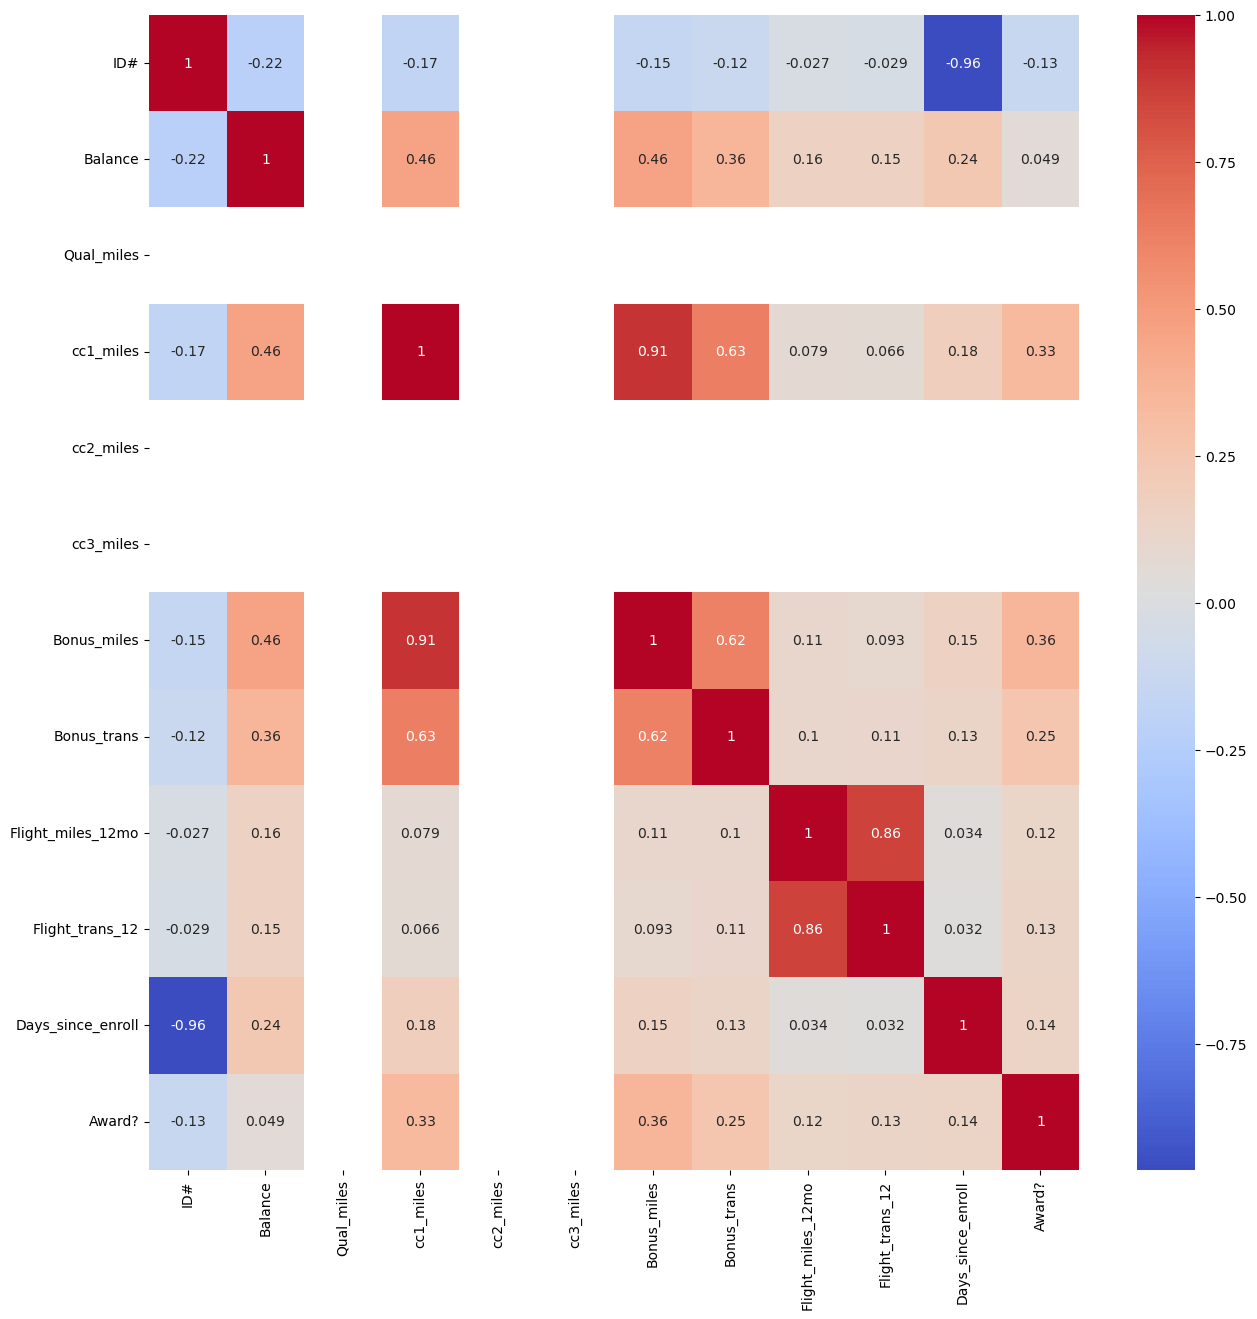

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap=plt.cm.coolwarm)
plt.show

In [23]:
print(df_new.Qual_miles.unique())
print(df_new.cc2_miles.unique())
print(df_new.cc3_miles.unique())


[0]
[1]
[1]


## Since Qual_miles,cc2_miles,cc3_miles are low variance data we can drop these column . And Flight_miles_12mo	Flight_trans_12	have crrelation (correlation among two features) we can drop any of these

In [25]:
df_new=df_new.drop(columns=["Qual_miles","cc2_miles","cc3_miles","Flight_miles_12mo","ID#"])
df_new

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0       28143          1          174            1                0   
1       19244          1          215            2                0   
2       41354          1         4123            4                0   
3       14776          1          500            1                0   
5       16420          1            0            0                0   
...       ...        ...          ...          ...              ...   
3994    18476          1         8525            4                1   
3995    64385          1          981            5                0   
3996    73597          3        25447            8                0   
3997    54899          1          500            1                1   
3998     3016          1            0            0                0   

      Days_since_enroll  Award?  
0                  7000       0  
1                  6968       0  
2                  7034       0  
3                  6952       0  
5                  6942       0  
...                 ...     ...  
3994               1403       1  
3995               1395       1  
3996               1402       1  
3997               1401       0  
3998               1398       0  

[2875 rows x 7 columns]

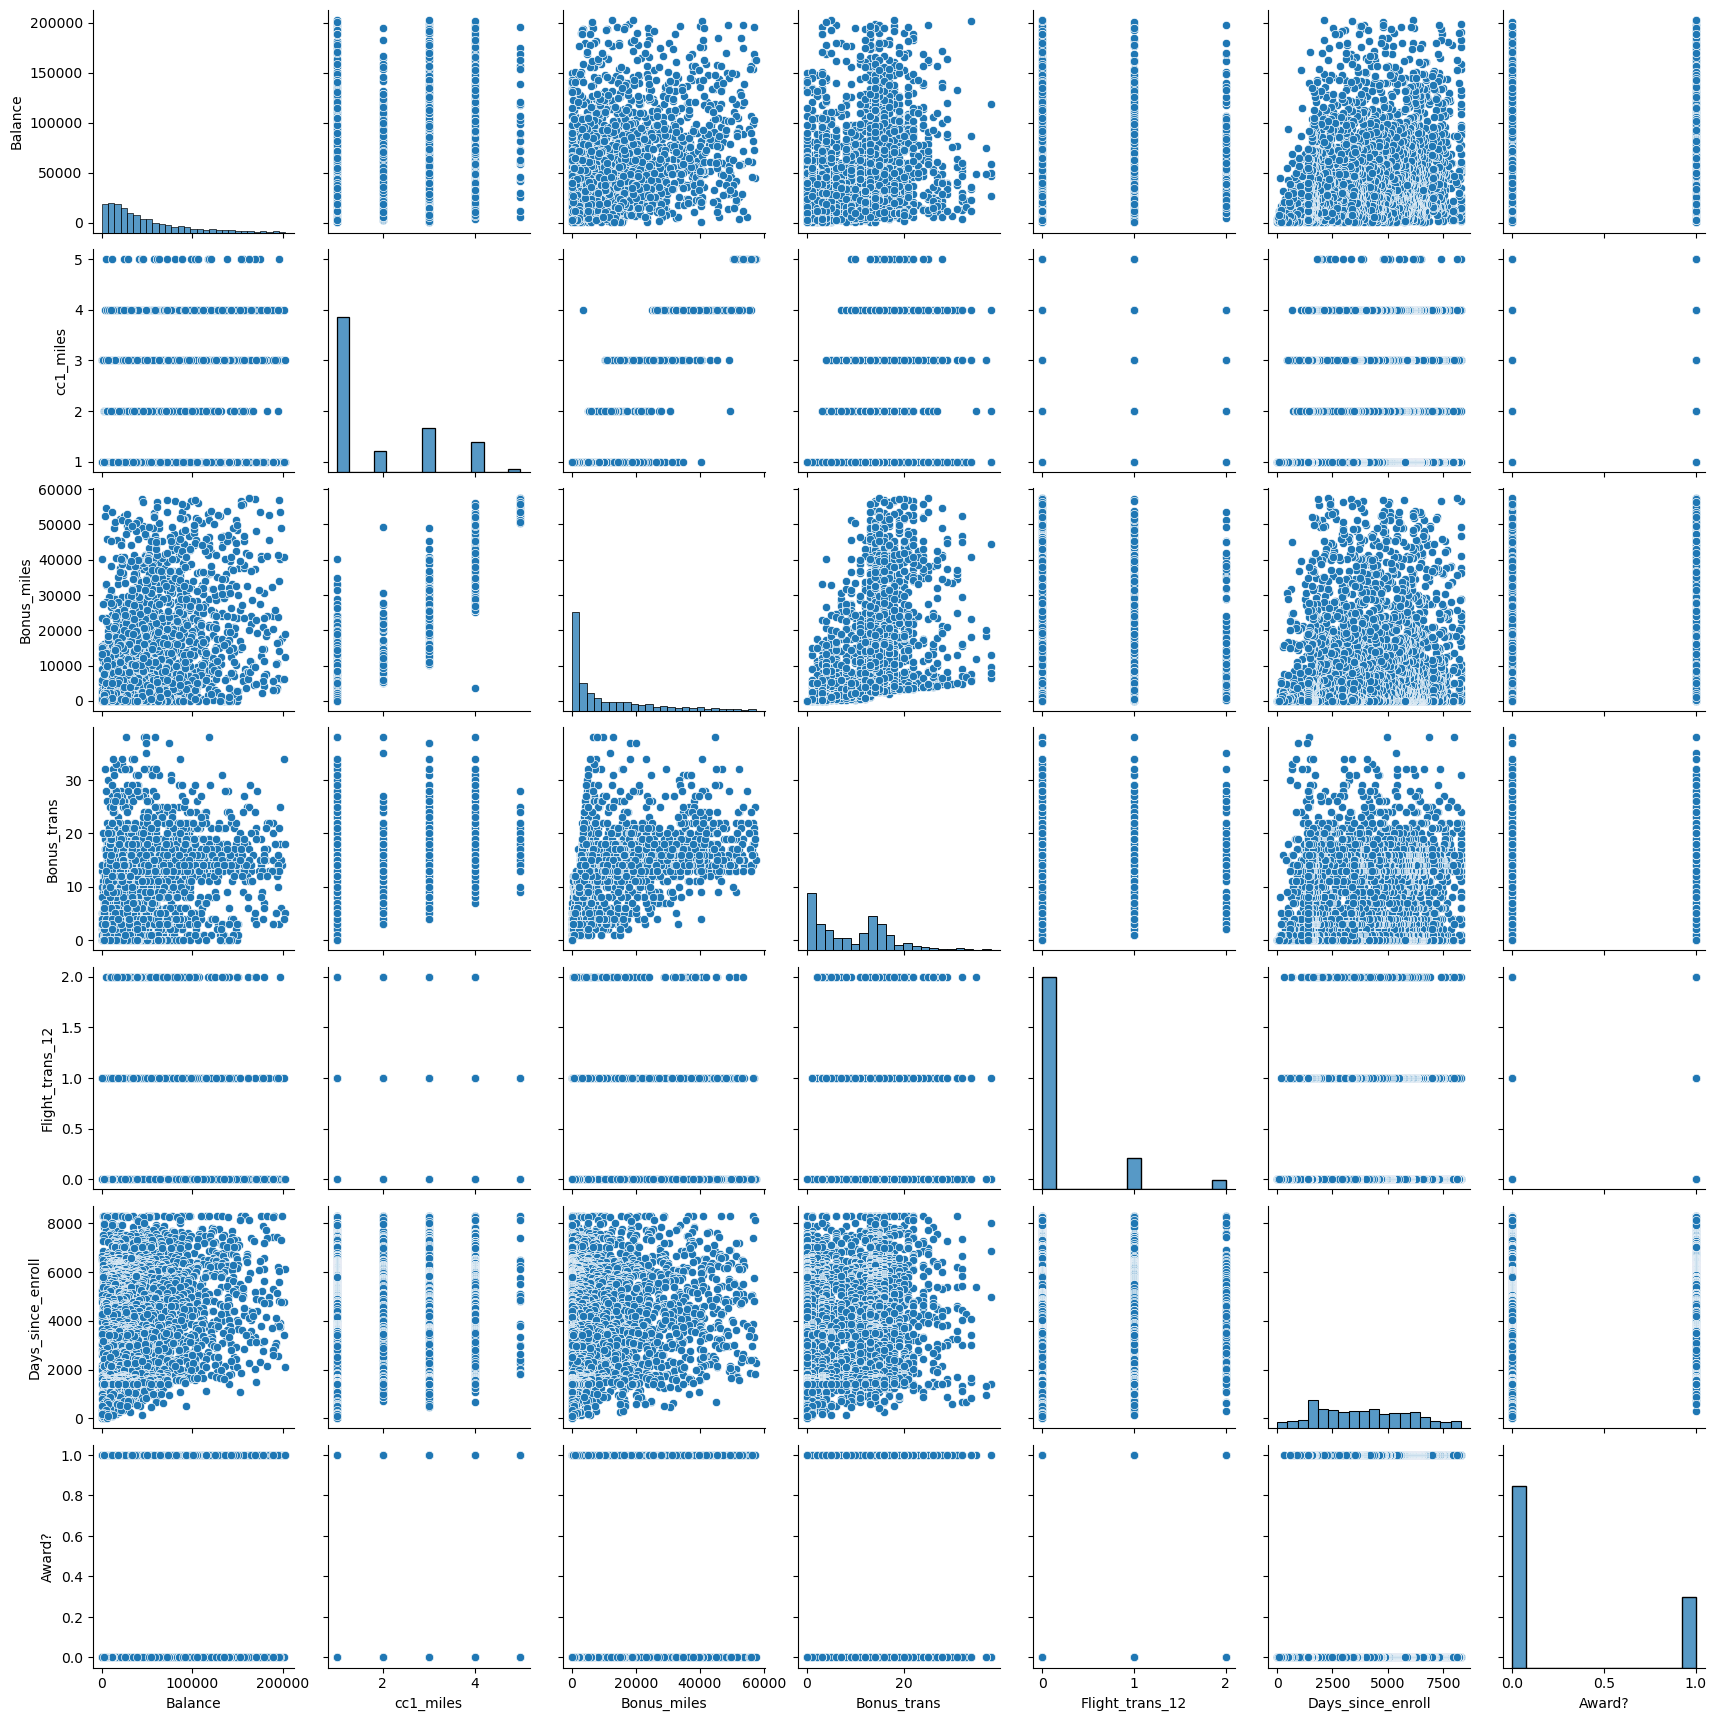

In [26]:
sns.pairplot(df_new)

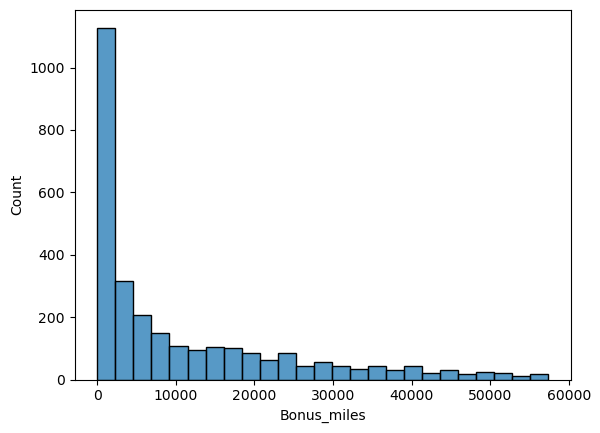

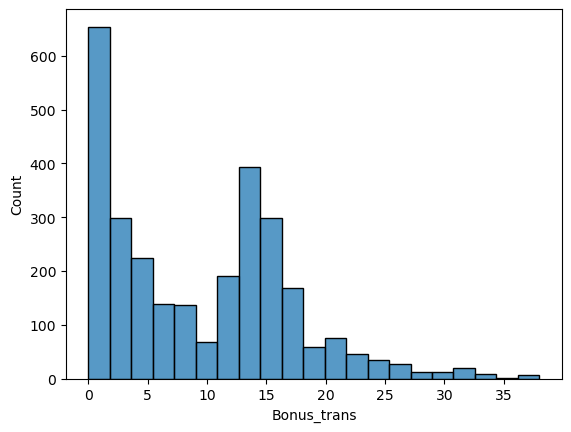

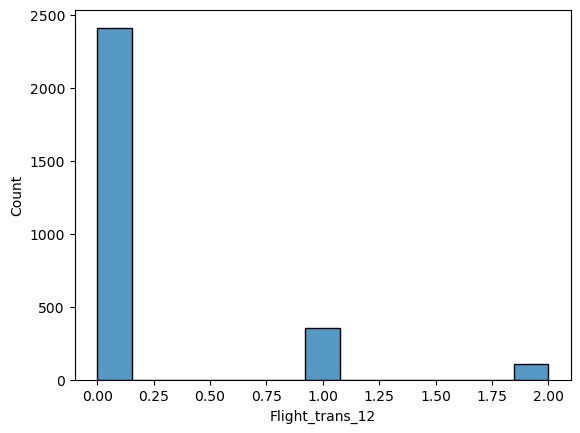

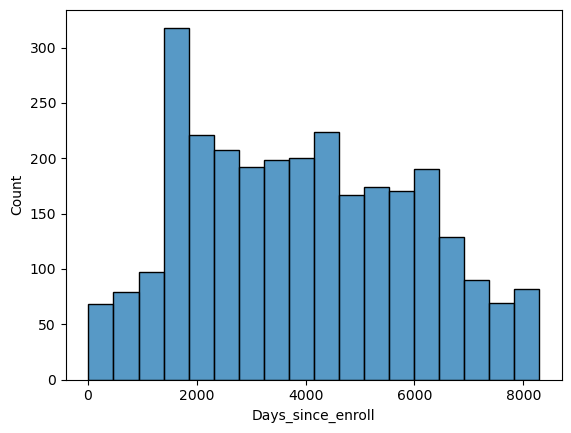

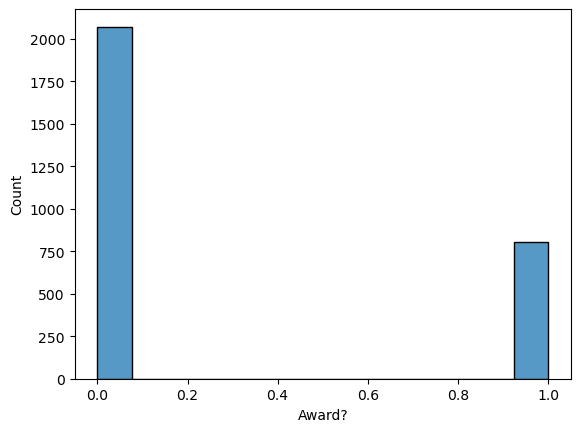

In [27]:
for i in df_new.columns:
    sns.histplot(x=df_new[i])
    plt.xlabel(i)     
    plt.show()

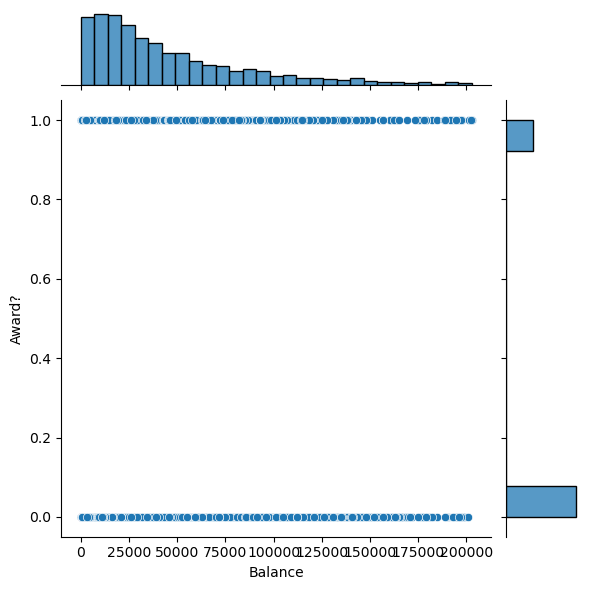

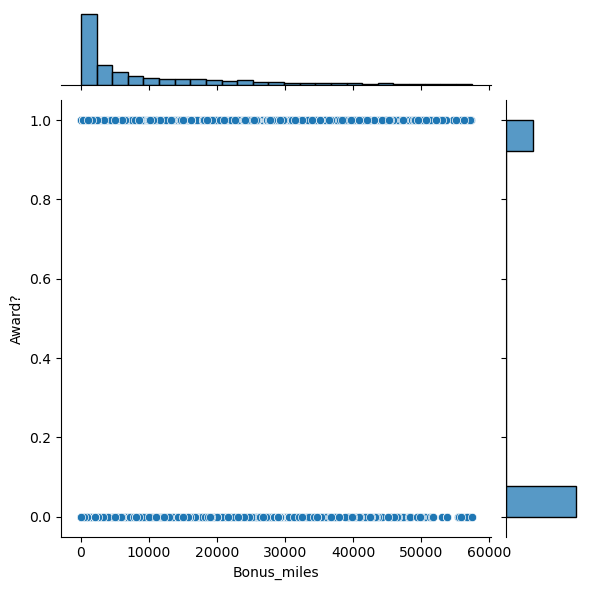

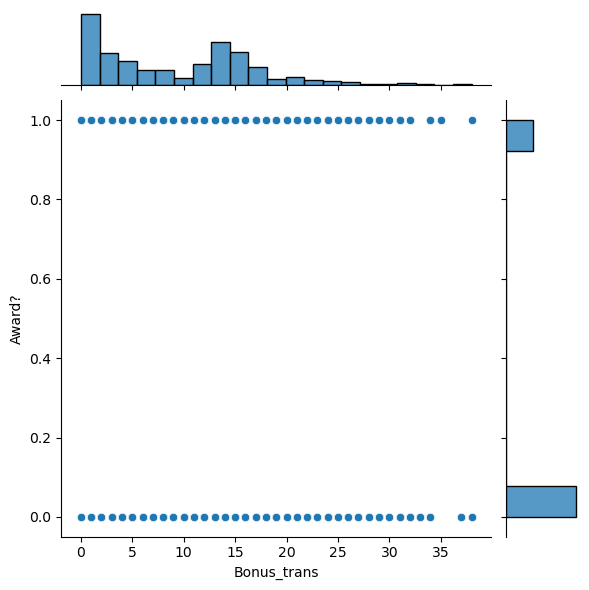

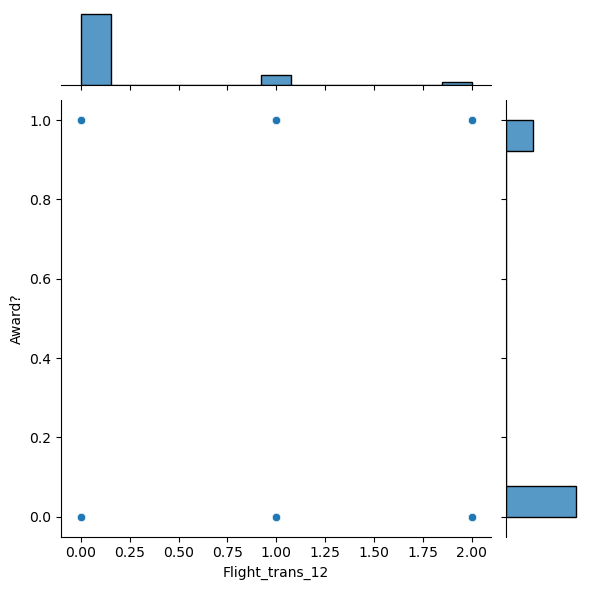

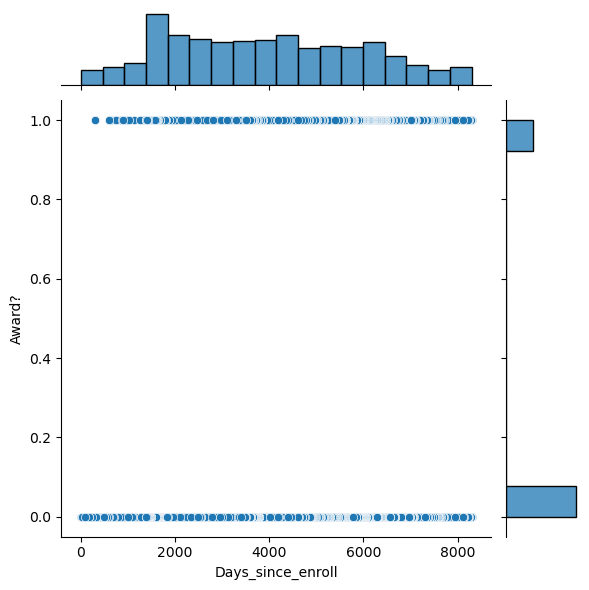

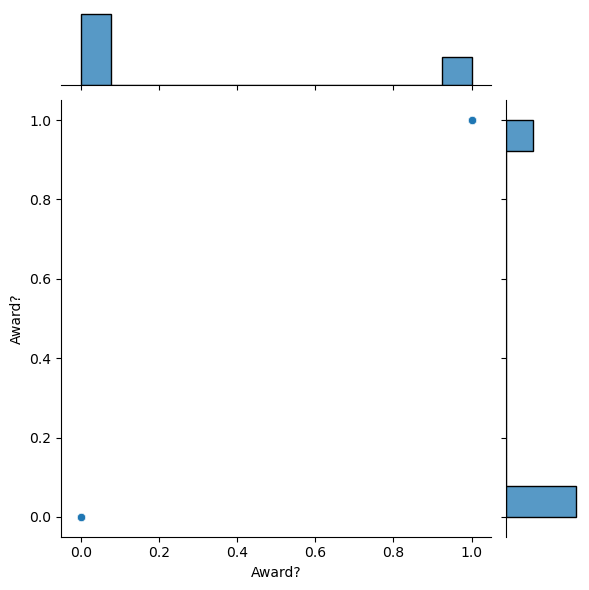

In [28]:
for i in df_new.columns:
    sns.jointplot(data=df_new,x=i,y="Award?")

## K_Means

In [30]:
df_new

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0       28143          1          174            1                0   
1       19244          1          215            2                0   
2       41354          1         4123            4                0   
3       14776          1          500            1                0   
5       16420          1            0            0                0   
...       ...        ...          ...          ...              ...   
3994    18476          1         8525            4                1   
3995    64385          1          981            5                0   
3996    73597          3        25447            8                0   
3997    54899          1          500            1                1   
3998     3016          1            0            0                0   

      Days_since_enroll  Award?  
0                  7000       0  
1                  6968       0  
2                  7034       0  
3                  6952       0  
5                  6942       0  
...                 ...     ...  
3994               1403       1  
3995               1395       1  
3996               1402       1  
3997               1401       0  
3998               1398       0  

[2875 rows x 7 columns]

In [31]:
features=df_new.iloc[:,:]
features

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0       28143          1          174            1                0   
1       19244          1          215            2                0   
2       41354          1         4123            4                0   
3       14776          1          500            1                0   
5       16420          1            0            0                0   
...       ...        ...          ...          ...              ...   
3994    18476          1         8525            4                1   
3995    64385          1          981            5                0   
3996    73597          3        25447            8                0   
3997    54899          1          500            1                1   
3998     3016          1            0            0                0   

      Days_since_enroll  Award?  
0                  7000       0  
1                  6968       0  
2                  7034       0  
3                  6952       0  
5                  6942       0  
...                 ...     ...  
3994               1403       1  
3995               1395       1  
3996               1402       1  
3997               1401       0  
3998               1398       0  

[2875 rows x 7 columns]

In [32]:
std=StandardScaler()

In [33]:
## Note: For all the clustering done below, we used te same dataset features to fit the model ,since it is a scled dataset
features=pd.DataFrame(std.fit_transform(features),columns=features.columns)
features

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0    -0.438859  -0.719055    -0.783131    -1.081732        -0.409708   
1    -0.647735  -0.719055    -0.780130    -0.952735        -0.409708   
2    -0.128773  -0.719055    -0.494075    -0.694742        -0.409708   
3    -0.752607  -0.719055    -0.759268    -1.081732        -0.409708   
4    -0.714019  -0.719055    -0.795867    -1.210728        -0.409708   
...        ...        ...          ...          ...              ...   
2870 -0.665761  -0.719055    -0.171862    -0.694742         1.653181   
2871  0.411806  -0.719055    -0.724061    -0.565745        -0.409708   
2872  0.628028   1.013789     1.066780    -0.178756        -0.409708   
2873  0.189152  -0.719055    -0.759268    -1.081732         1.653181   
2874 -1.028635  -0.719055    -0.795867    -1.210728        -0.409708   

      Days_since_enroll    Award?  
0              1.503693 -0.623072  
1              1.488035 -0.623072  
2              1.520330 -0.623072  
3              1.480206 -0.623072  
4              1.475312 -0.623072  
...                 ...       ...  
2870          -1.235018  1.604952  
2871          -1.238933  1.604952  
2872          -1.235507  1.604952  
2873          -1.235997 -0.623072  
2874          -1.237465 -0.623072  

[2875 rows x 7 columns]

In [34]:
### Finding the number of clusters using Elbow method

In [35]:
wcss=[]
n_clusters=range(1,11)
for i in n_clusters:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    print(i,kmeans.inertia_)

1 20125.000000000007
2 13584.062915582015
3 12066.461653568409
4 10662.13572210236
5 9619.181149500084
6 8541.980063755133
7 7649.8900214018195
8 7089.710330135469
9 7080.719307755973
10 6351.341073883126


Text(0, 0.5, 'Wcss')

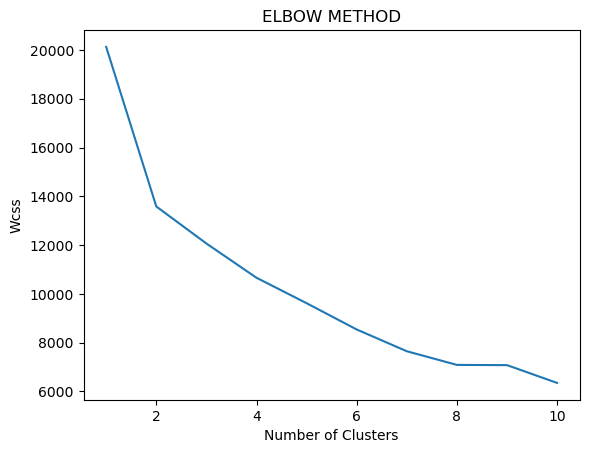

In [36]:
plt.plot(n_clusters,wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")

In [37]:
## Based on this we can take n_clusters as either 2 or 3

#### Model1

In [39]:
kmeans=KMeans(n_clusters=2)

In [40]:
kmeans.fit(features)

KMeans(n_clusters=2)

In [41]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
df_new["Label"]=kmeans.labels_
df_new

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0       28143          1          174            1                0   
1       19244          1          215            2                0   
2       41354          1         4123            4                0   
3       14776          1          500            1                0   
5       16420          1            0            0                0   
...       ...        ...          ...          ...              ...   
3994    18476          1         8525            4                1   
3995    64385          1          981            5                0   
3996    73597          3        25447            8                0   
3997    54899          1          500            1                1   
3998     3016          1            0            0                0   

      Days_since_enroll  Award?  Label  
0                  7000       0      0  
1                  6968       0      0  
2                  7034       0      0  
3                  6952       0      0  
5                  6942       0      0  
...                 ...     ...    ...  
3994               1403       1      0  
3995               1395       1      0  
3996               1402       1      1  
3997               1401       0      0  
3998               1398       0      0  

[2875 rows x 8 columns]

In [ ]:
## Note: PCA has done to plot the clustering. PCA reduces the 7 features into two features. Same approach is used for DBSCAN

In [43]:
pca=PCA(n_components=2)

In [44]:
feature_tra=pca.fit_transform(features)
feature_tra

array([[-1.37408361,  0.29064406],
       [-1.39269923,  0.25278575],
       [-0.93481311,  0.22465851],
       ...,
       [ 1.3997775 , -0.62868035],
       [-1.39216471,  1.35772957],
       [-2.14436555, -0.52819509]])

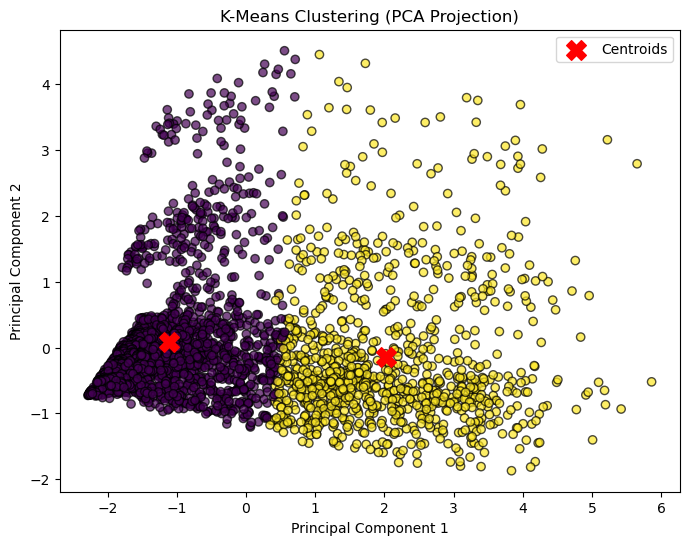

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(feature_tra[:, 0],feature_tra[:, 1], c=df_new["Label"], cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids') 
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [46]:
df_new.iloc[:,:].groupby("Label").agg(["mean"])

Balance cc1_miles   Bonus_miles Bonus_trans Flight_trans_12  \
               mean      mean          mean        mean            mean   
Label                                                                     
0      31104.256866  1.077544   2920.194938    5.533656        0.161012   
1      75545.433202  3.202358  25380.032417   16.412574        0.267191   

      Days_since_enroll    Award?  
                   mean      mean  
Label                              
0           3600.625740  0.162089  
1           4522.246562  0.494106

In [47]:
df_new["Label"].value_counts()

Label
0    1857
1    1018
Name: count, dtype: int64

In [48]:
silhouette_kmeans = silhouette_score(features, kmeans.labels_)
silhouette_kmeans

0.3381170711343459

Cluster Analysis and Interpretation: Kmeans cluster with 2 compenents most of the data lies in Cluster 1.

Eventhough we have clustered the data with 3 components we can't say it as a good clustering , because its silhouette_score is 0.33811

#### Model2

In [51]:
kmeans=KMeans(n_clusters=3)

In [52]:
kmeans.fit(features)

KMeans(n_clusters=3)

In [53]:
kmeans.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [54]:
df_new["Label"]=kmeans.labels_
df_new

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0       28143          1          174            1                0   
1       19244          1          215            2                0   
2       41354          1         4123            4                0   
3       14776          1          500            1                0   
5       16420          1            0            0                0   
...       ...        ...          ...          ...              ...   
3994    18476          1         8525            4                1   
3995    64385          1          981            5                0   
3996    73597          3        25447            8                0   
3997    54899          1          500            1                1   
3998     3016          1            0            0                0   

      Days_since_enroll  Award?  Label  
0                  7000       0      0  
1                  6968       0      0  
2                  7034       0      0  
3                  6952       0      0  
5                  6942       0      0  
...                 ...     ...    ...  
3994               1403       1      2  
3995               1395       1      2  
3996               1402       1      1  
3997               1401       0      2  
3998               1398       0      2  

[2875 rows x 8 columns]

In [55]:
pca=PCA(n_components=2)

In [56]:
feature_tra=pca.fit_transform(features)
feature_tra

array([[-1.37408361,  0.29064406],
       [-1.39269923,  0.25278575],
       [-0.93481311,  0.22465851],
       ...,
       [ 1.3997775 , -0.62868035],
       [-1.39216471,  1.35772957],
       [-2.14436555, -0.52819509]])

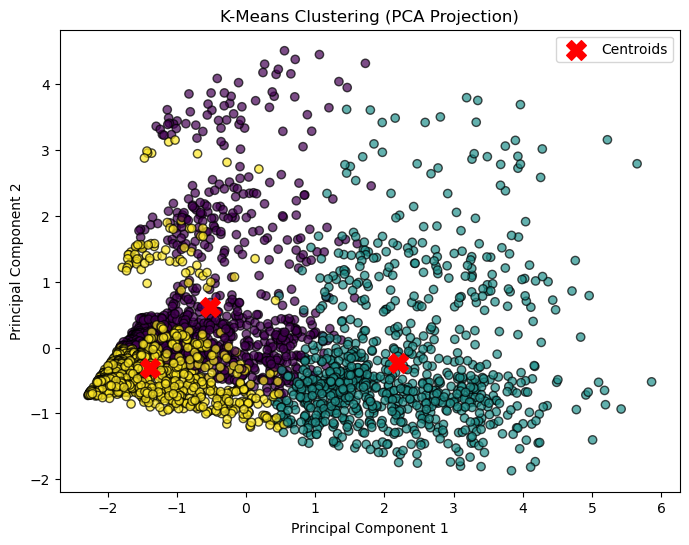

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(feature_tra[:, 0],feature_tra[:, 1], c=df_new["Label"], cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids') 
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [58]:
silhouette_kmeans = silhouette_score(features, kmeans.labels_)
silhouette_kmeans

0.21936411574078224

In [59]:
df_new.iloc[:,:].groupby("Label").agg(["mean"])

Balance cc1_miles   Bonus_miles Bonus_trans Flight_trans_12  \
               mean      mean          mean        mean            mean   
Label                                                                     
0      45505.927847  1.174746   4205.656144    7.340474        0.290868   
1      75803.646205  3.381696  27463.501116   16.585938        0.257812   
2      24159.369048  1.088828   2675.788462    5.139194        0.075092   

      Days_since_enroll    Award?  
                   mean      mean  
Label                              
0           5494.178129  0.297632  
1           4398.380580  0.503348  
2           2267.146520  0.081502

In [60]:
df_new["Label"].value_counts()

Label
2    1092
1     896
0     887
Name: count, dtype: int64

Cluster Analysis and Interpretation:
Kmeans cluster with 3 compenents most of the data lies in Cluster 0 . 

Eventhough we have clustered the data with 3 components we can't say it as a good clustering , because its silhouette_score is 0.359483 

## DBSCAN`

## Model 1

In [64]:
### Using the same feature dataset which is already scaled for performing clustering

In [65]:
dbscan=DBSCAN(eps=.5,min_samples=12)

In [66]:
dbscan

DBSCAN(min_samples=12)

In [67]:
dbscan.fit(features)

DBSCAN(min_samples=12)

In [68]:
df_new["Label"]=dbscan.labels_
df_new

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0       28143          1          174            1                0   
1       19244          1          215            2                0   
2       41354          1         4123            4                0   
3       14776          1          500            1                0   
5       16420          1            0            0                0   
...       ...        ...          ...          ...              ...   
3994    18476          1         8525            4                1   
3995    64385          1          981            5                0   
3996    73597          3        25447            8                0   
3997    54899          1          500            1                1   
3998     3016          1            0            0                0   

      Days_since_enroll  Award?  Label  
0                  7000       0      0  
1                  6968       0      0  
2                  7034       0      0  
3                  6952       0      0  
5                  6942       0      0  
...                 ...     ...    ...  
3994               1403       1     -1  
3995               1395       1     -1  
3996               1402       1     -1  
3997               1401       0     -1  
3998               1398       0      0  

[2875 rows x 8 columns]

In [69]:
df_new.iloc[:,:].groupby("Label").agg(["mean"])

Balance cc1_miles   Bonus_miles Bonus_trans Flight_trans_12  \
               mean      mean          mean        mean            mean   
Label                                                                     
-1     68321.775391  2.416016  18118.795573   13.399089        0.352214   
 0     20699.263300  1.000000   1240.850316    4.064022        0.000000   
 1     19811.931507  1.000000   1428.013699    1.931507        0.000000   
 2     25025.105263  3.000000  19157.894737   15.789474        0.000000   
 3     46759.631579  3.000000  15221.368421   12.736842        0.000000   
 4     19876.600000  1.000000    687.533333    1.800000        1.000000   
 5     20084.689655  3.000000  15850.689655   14.517241        0.000000   
 6     75191.750000  3.000000  18824.666667   14.583333        0.000000   
 7     43087.058824  3.000000  13809.058824   13.470588        0.000000   
 8     44226.315789  2.000000   8360.263158   14.000000        0.000000   
 9     25342.500000  1.000000  16321.666667    5.666667        0.000000   

      Days_since_enroll    Award?  
                   mean      mean  
Label                              
-1          4384.540365  0.444661  
 0          3399.394950  0.000000  
 1          3907.452055  1.000000  
 2          5947.789474  1.000000  
 3          5616.052632  0.000000  
 4          2580.833333  0.000000  
 5          3255.448276  1.000000  
 6          2215.083333  0.000000  
 7          1776.764706  0.000000  
 8          1966.578947  0.000000  
 9          1207.083333  0.000000

In [70]:
df_new["Label"].value_counts()

Label
-1    1536
 0    1109
 1      73
 4      30
 5      29
 2      19
 3      19
 8      19
 7      17
 6      12
 9      12
Name: count, dtype: int64

In [71]:
silhouette_dbscan = silhouette_score(features, dbscan.labels_)
silhouette_dbscan

-0.16172184863254285

In [72]:
pca=PCA(n_components=2)

In [73]:
feature_tra=pca.fit_transform(features)
feature_tra

array([[-1.37408361,  0.29064406],
       [-1.39269923,  0.25278575],
       [-0.93481311,  0.22465851],
       ...,
       [ 1.3997775 , -0.62868035],
       [-1.39216471,  1.35772957],
       [-2.14436555, -0.52819509]])

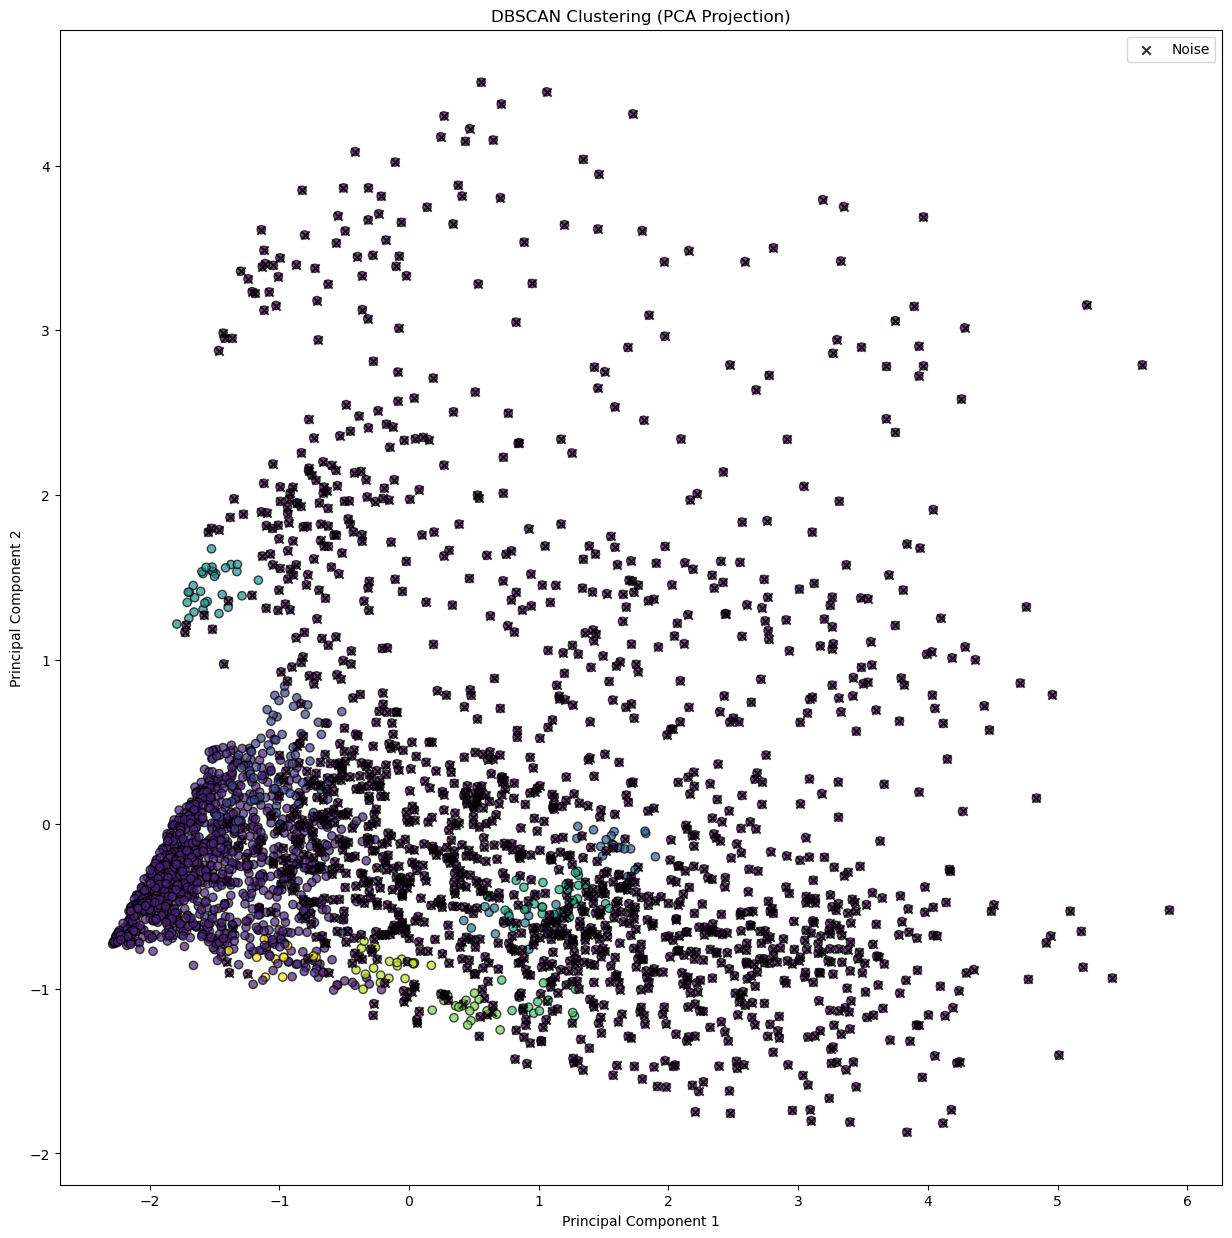

In [74]:
plt.figure(figsize=(15, 15))
plt.scatter(feature_tra[:, 0],feature_tra[:, 1], c=df_new["Label"], cmap='viridis', alpha=0.7, edgecolors='k')
noise_mask = dbscan.labels_ == -1
plt.scatter(feature_tra[noise_mask, 0], feature_tra[noise_mask, 1], c='black', marker='x', label='Noise', alpha=0.8)

plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Based on the first model of dbscan clustering, we can't say it as good clustering model. And it has large number of noise data

## Model2 

In [77]:
dbscan=DBSCAN(eps=1.5,min_samples=10)

In [78]:
dbscan.fit(features)


DBSCAN(eps=1.5, min_samples=10)

In [79]:
df_new["Label"]=dbscan.labels_
df_new

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_trans_12  \
0       28143          1          174            1                0   
1       19244          1          215            2                0   
2       41354          1         4123            4                0   
3       14776          1          500            1                0   
5       16420          1            0            0                0   
...       ...        ...          ...          ...              ...   
3994    18476          1         8525            4                1   
3995    64385          1          981            5                0   
3996    73597          3        25447            8                0   
3997    54899          1          500            1                1   
3998     3016          1            0            0                0   

      Days_since_enroll  Award?  Label  
0                  7000       0      0  
1                  6968       0      0  
2                  7034       0      0  
3                  6952       0      0  
5                  6942       0      0  
...                 ...     ...    ...  
3994               1403       1      1  
3995               1395       1      2  
3996               1402       1      2  
3997               1401       0      3  
3998               1398       0      0  

[2875 rows x 8 columns]

In [80]:
df_new.iloc[:,:].groupby("Label").agg(["mean"])

Balance cc1_miles   Bonus_miles Bonus_trans Flight_trans_12  \
                mean      mean          mean        mean            mean   
Label                                                                      
-1     105127.673469  2.561224  20824.295918   16.836735        1.561224   
 0      42734.926829  1.568182   7472.756098    7.861973        0.000000   
 1      47835.957143  2.478571  20192.764286   12.450000        1.000000   
 2      45622.309365  2.431438  18122.118729   12.157191        0.000000   
 3      59777.567708  1.750000  10196.848958    9.666667        1.000000   
 4      42164.372093  1.023256   2703.093023    6.558140        2.000000   

      Days_since_enroll    Award?  
                   mean      mean  
Label                              
-1          4417.897959  0.673469  
 0          3718.255543  0.000000  
 1          4236.542857  1.000000  
 2          4388.463211  1.000000  
 3          4029.052083  0.000000  
 4          3682.023256  0.000000

In [81]:
df_new["Label"].value_counts()

Label
 0    1804
 2     598
 3     192
 1     140
-1      98
 4      43
Name: count, dtype: int64

In [82]:
silhouette_dbscan = silhouette_score(features, dbscan.labels_)
silhouette_dbscan

0.216007362577971

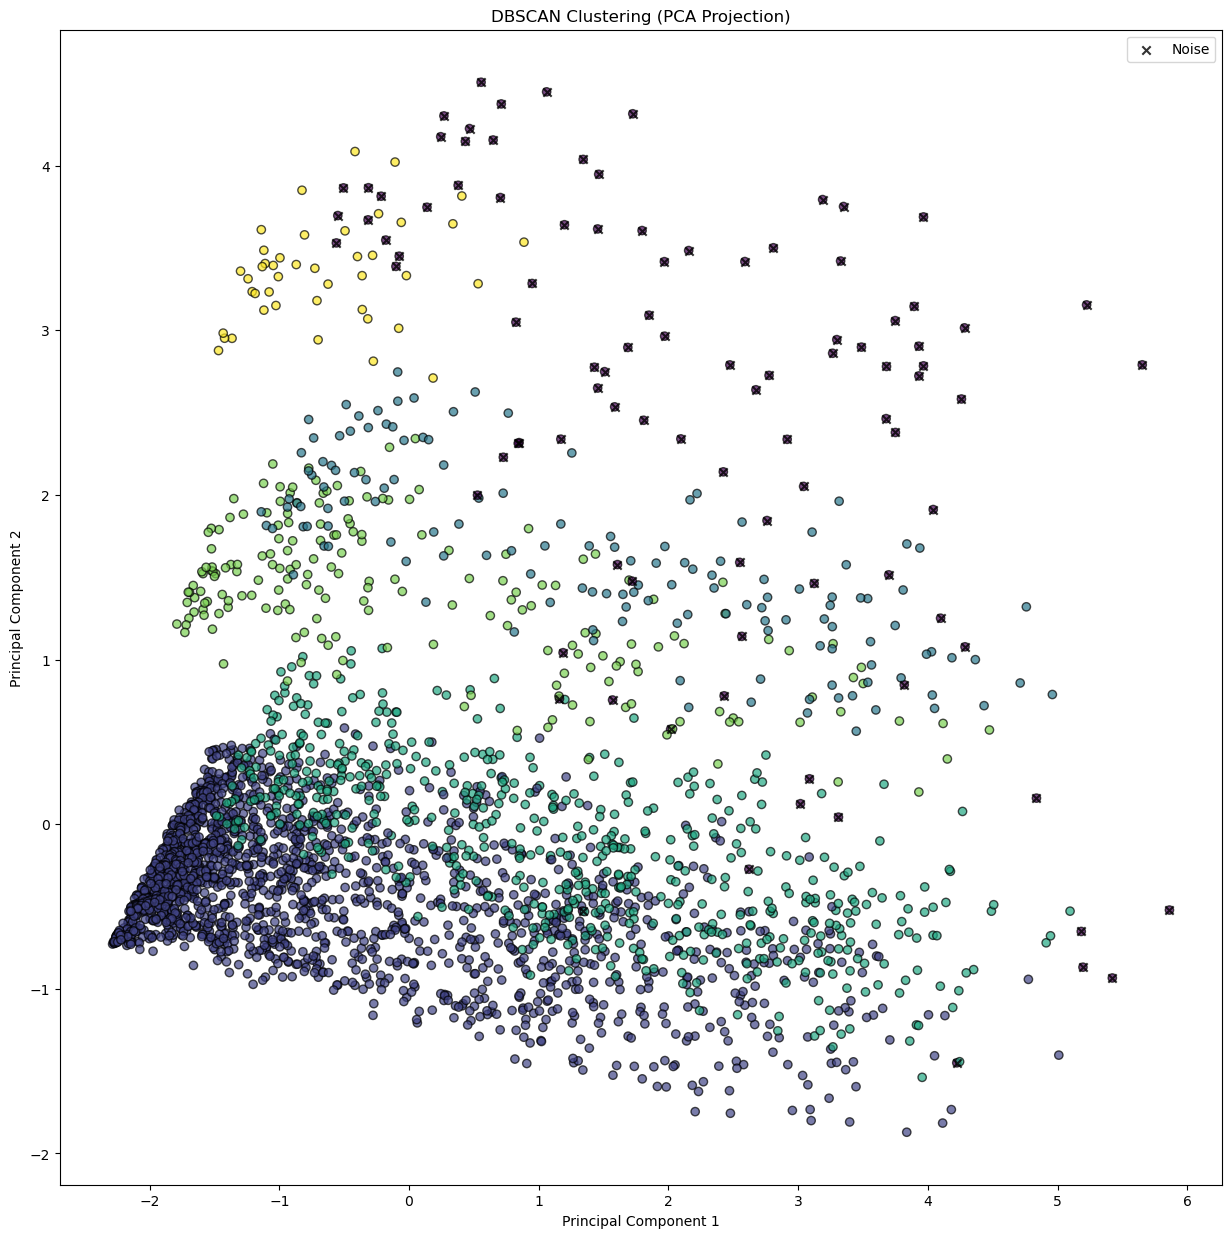

In [83]:
plt.figure(figsize=(15, 15))
plt.scatter(feature_tra[:, 0],feature_tra[:, 1], c=df_new["Label"], cmap='viridis', alpha=0.7, edgecolors='k')
noise_mask = dbscan.labels_ == -1
plt.scatter(feature_tra[noise_mask, 0], feature_tra[noise_mask, 1], c='black', marker='x', label='Noise', alpha=0.8)

plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Based on second model od dbscan clustering, its  a good model with a good silhouette_score compare to model 1. And here also numerous data is take as noise data 

## Agglomerative clustering

## Model 1

In [87]:
agg_clu=AgglomerativeClustering(n_clusters=7,metric="euclidean",linkage="average")

In [88]:
agg_clu.fit(features)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [89]:
agg_clu.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [90]:
df_new["Label"]=agg_clu.labels_

In [91]:
df_new["Label"].value_counts()

Label
4    1948
1     572
2     265
3      33
0      33
6      22
5       2
Name: count, dtype: int64

In [92]:
df_new.iloc[:,:].groupby("Label").agg(["mean"])

Balance cc1_miles   Bonus_miles Bonus_trans Flight_trans_12  \
                mean      mean          mean        mean            mean   
Label                                                                      
0       91311.272727  3.181818  26709.424242   20.484848        1.787879   
1       90399.830420  2.980769  21740.879371   14.620629        0.174825   
2       70990.618868  3.784906  35056.192453   17.358491        0.301887   
3      145471.030303  1.030303   4915.060606    3.424242        0.757576   
4       27918.653491  1.221766   4253.103696    6.637577        0.133470   
5       74209.000000  4.000000  41204.500000   30.500000        1.500000   
6       81675.818182  1.181818   5588.090909   10.954545        2.000000   

      Days_since_enroll    Award?  
                   mean      mean  
Label                              
0           5104.696970  1.000000  
1           4571.858392  0.000000  
2           4770.358491  1.000000  
3           3827.181818  0.575758  
4           3587.166324  0.243326  
5           1148.500000  0.000000  
6           5723.272727  0.590909

In [93]:
linked=linkage(features,"average")

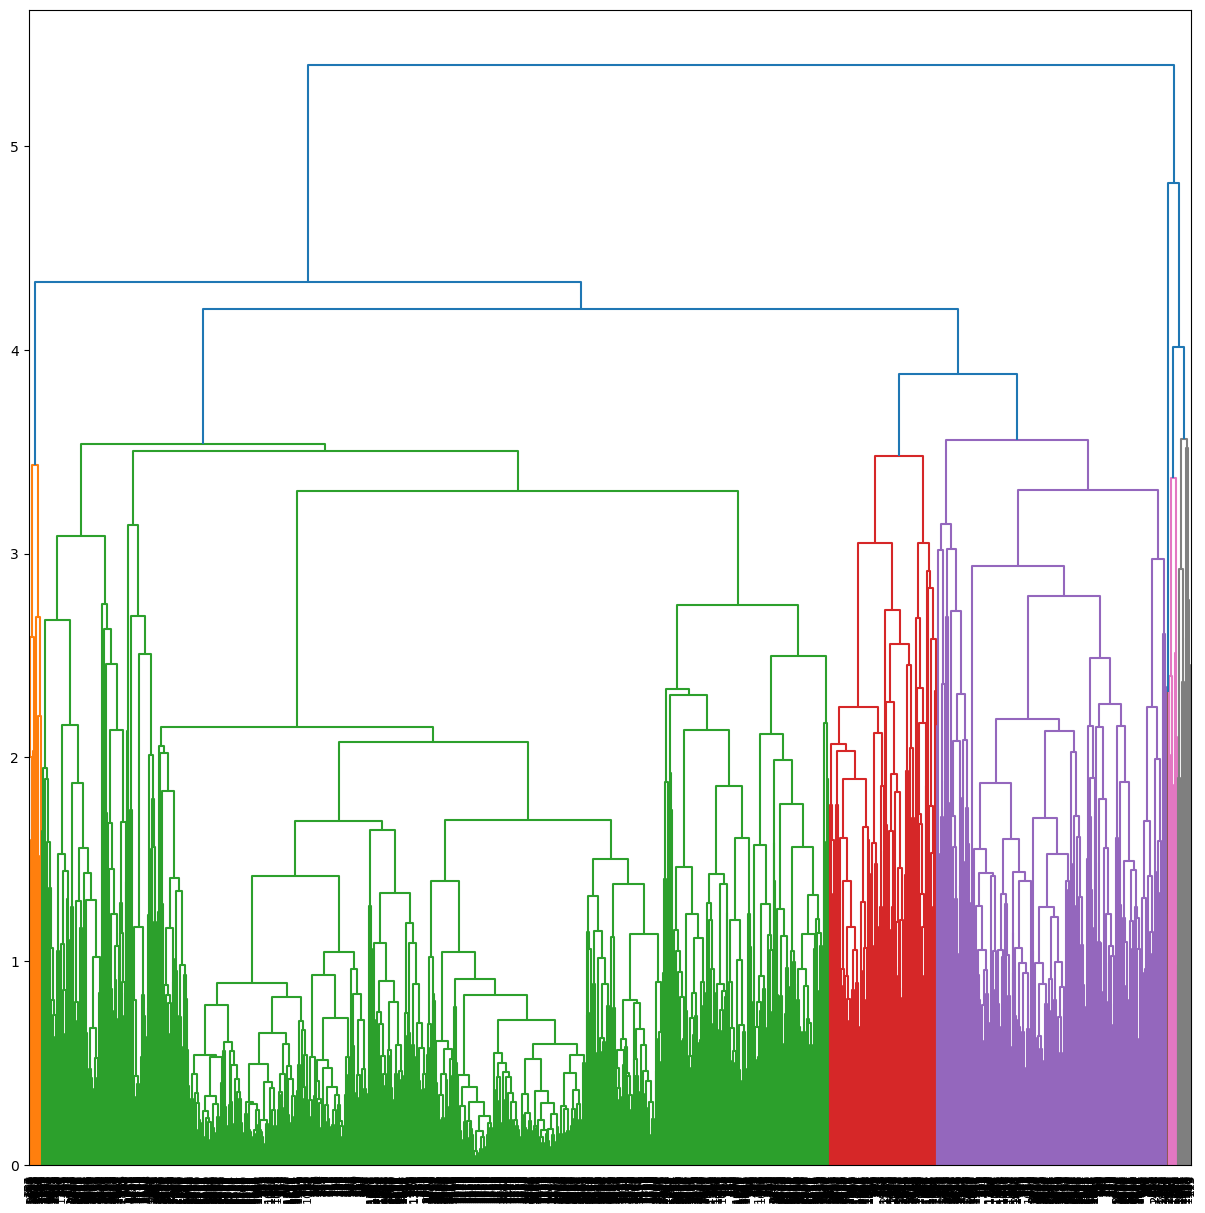

In [94]:
plt.figure(figsize=(15,15))
dm=dendrogram(linked,leaf_rotation=90, leaf_font_size=8)

## Model 2

In [96]:
agg_clu=AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="complete")

In [97]:
agg_clu.fit(features)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [98]:
agg_clu.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [99]:
df_new["Label"]=agg_clu.labels_

In [100]:
df_new.iloc[:,:].groupby("Label").agg(["mean"])

Balance cc1_miles   Bonus_miles Bonus_trans Flight_trans_12  \
                mean      mean          mean        mean            mean   
Label                                                                      
0       35194.080432  1.212849   3980.877881    6.663070        0.204022   
1       56361.436275  3.259804  25696.563725   15.482026        0.096405   
2      132594.673575  3.471503  31816.601036   17.072539        0.243523   
3       91005.000000  3.967742  41153.677419   20.258065        1.580645   

      Days_since_enroll    Award?  
                   mean      mean  
Label                              
0           3709.431584  0.174105  
1           4229.854575  0.606209  
2           5083.103627  0.253886  
3           5057.032258  0.935484

In [101]:
linked=linkage(features,"complete")

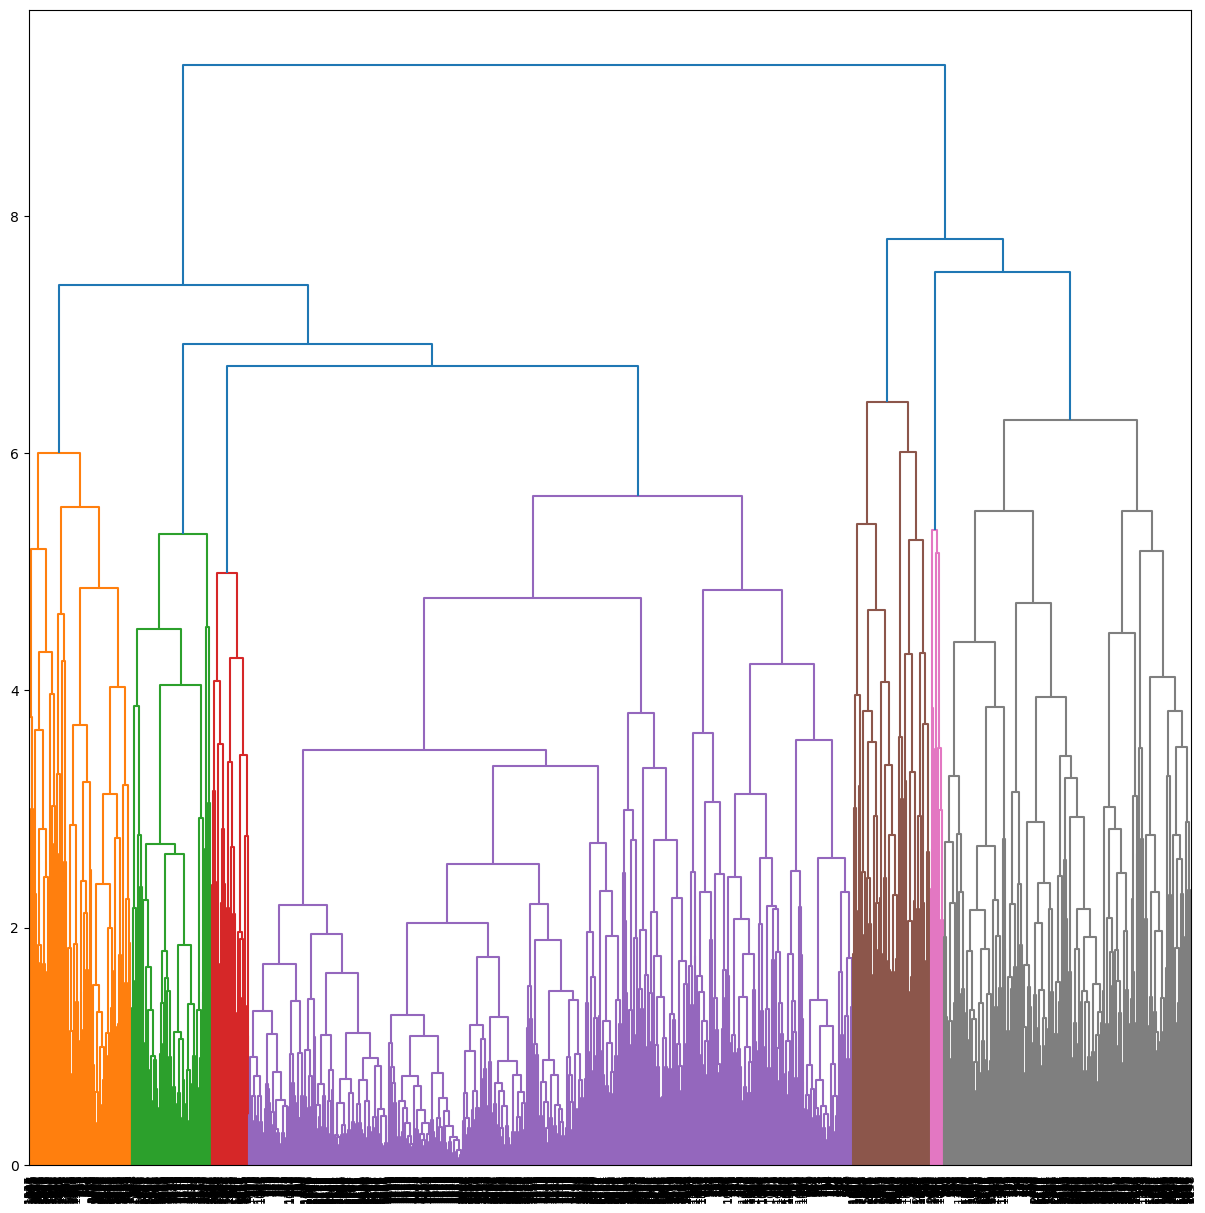

In [102]:
plt.figure(figsize=(15,15))
dm=dendrogram(linked,leaf_rotation=90, leaf_font_size=8)